In [2]:
import matplotlib.pyplot as plt

import numpy as np
from scipy import integrate

## Kinetics simulations

E + S ⇌ ES ⇌ E + P

Rate constants are $k_\text{f}, k_\text{r}, k_\text{cat}$

In [ ]:
class NanoPrism:
    def __init__(self, Gface=5000, Gface_dagger=2500, k0=1e-3, K298=1e5, T=298):
        self.Gface = Gface
        self.Gface_dagger = Gface_dagger
        self.k0 = k0
        # k0 = Ag+ -> Ag rate...
        self.K298 = K298
        self.T=T

M = mol/L = mol/dm³
mM = mmol/dm³
M = mmol/cm³
M = µmol/mm³
M = fmol/µm³

In [281]:
Au_mol_per_cm_cubed = (19.3/196.96657)
Au_fmol_um3 = Au_mol_per_cm_cubed * 1e-15/1e-12

In [282]:
Au_fmol_um3

9.798617095276626e-05

In [283]:
class NanoSphere:
    def __init__(self, k0, V=1, rho=Au_fmol_um3):
        """Volume = 1 um³"""
        self.k0 = k0
        self.V = V
        self.rho= rho
    
    def __call__(self, y, t):
        """State vector is radius, [AuCl₄]. 
        dn/rho = dV = 4*pi*r²*dr
        dn/(rho * 4*pi*r²) = dr
        """
        A = y[1]**2 * 4 * np.pi # um²
        rate = self.k0*A*y[0] # rate in fmol/s, y[0] in fmol/um³, A in um², k in 1/um-s
        
        return np.array([-rate/self.V,
                         rate/(self.rho * A)
        ])

In [315]:
au = NanoSphere(2e-5, V=0.0001)
y0 = np.array([1e-3,0.002])
t = np.linspace(0, 600, 2001)
out = integrate.odeint(au, y0, t)

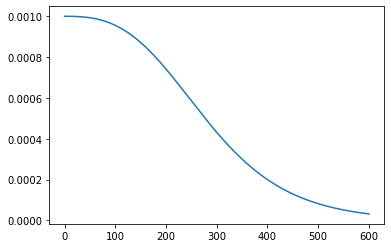

In [316]:
plt.plot(t, out[:, 0])

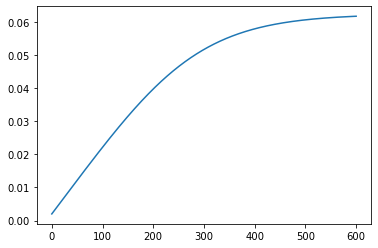

In [317]:
plt.plot(t, out[:, 1])

In [293]:
1e-3/Au_fmo_um3

10.20552176165803

In [69]:
import matplotlib.pyplot as plt
import numpy as np

ValueError: x and y arrays must consist of at least 3 unique points

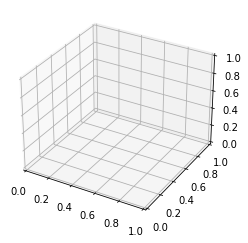

In [113]:
bottom = np.c_[[0, 0, 1], [0, 1, 1], [0, 0, 0]]
top = np.c_[[0, 0, 1], [0, 1, 1], [1, 1, 1]]


ax = plt.figure().add_subplot(projection='3d')

# bottom pts...
ax.plot_trisurf(top_bottom[0], top_bottom[1], top_bottom[2], linewidth=0.2, antialiased=True)
ax.set_axis_off()
ax

In [106]:
from scipy.spatial import Delaunay

In [115]:
top_bottom = np.r_[bottom, top]
tris = Delaunay(top_bottom)

In [139]:
from scipy.spatial import ConvexHull
from munch import Munch

In [230]:
def prism(s, h, offset=0):
    pts = np.array([
        [0, 0, 0],
        [s/2, s*np.sqrt(3)/2, 0],
        [-s/2, s*np.sqrt(3)/2, 0],
        [0, 0, h],
        [-s/2, s*np.sqrt(3)/2, h],
        [s/2, s*np.sqrt(3)/2, h],
        ])
    x, y, z = pts.T
    z = z + offset
    ch = ConvexHull(pts)
    return Munch(x=x, y=y, z=z, triangles=ch.simplices)
    

In [258]:
out = prism(1, 1, 0)

(-0.1, 3.9)

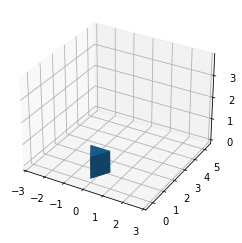

In [263]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(out.x, out.y, out.z, triangles=out.triangles, linewidth=0.2, antialiased=True)
ax.set_xlim3d(xmin=-3, xmax=3)
ax.set_ylim3d(ymin=-0.5, ymax=5.5)
ax.set_zlim3d(zmin=-0.1, zmax=3.9)

In [195]:
Delaunay()

TypeError: __init__() takes at least 2 positional arguments (1 given)

In [68]:
class Enzyme:
    def __init__(self, kf, kr, kcat):
        self.kf = kf
        self.kr = kr
        self.kcat = kcat
    
    def dydt(self, y, t):
        """State vector is S, E, ES, P"""
        kf, kr, kcat = self.kf, self.kr, self.kcat
        r1fwd = kf*y[0]*y[1]
        r1rev = kr * y[2]
        r2fwd = kcat * y[2]
        return np.array([
            -r1fwd + r1rev,
            -r1fwd + r1rev + r2fwd,
            r1fwd - r1rev - r2fwd,
            r2fwd
        ])
    
    def rate(self, y):
        return self.kcat * y.T[2]

In [64]:
e = Enzyme(1, 1, 1)
y0 = np.array([1, 0.1, 0, 0])
t= np.linspace(0, 1000, 1001)
out = integrate.odeint(e.dydt, y0, t)

In [65]:
out.shape
t.shape

(1001,)

In [66]:
 e.rate(out)

array([ 0.00000000e+00,  3.07301763e-02,  3.15460460e-02, ...,
       -6.45994816e-12, -6.40791137e-12, -6.35546167e-12])

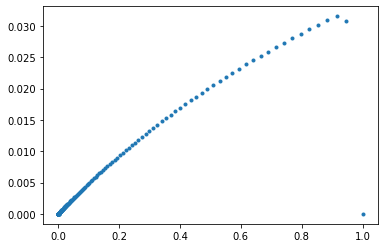

In [67]:
plt.plot(out[:, 0], e.rate(out), '.')